In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys

In [2]:
#!{sys.executable} -m pip install geopandas

### 1. Read the dataset

In [3]:
# get the full_dataset
dataset = gpd.read_file('dataset/dataset_thesis.shp')


In [165]:
%store -r preds
%store -r plex_preds
%store -r rf_preds

In [27]:
dataset["xgb_preds"]=preds
dataset["plex_preds"]=plex_preds
dataset["rf_preds"]=rf_preds

In [29]:
dataset.drop(['AGB_preds'], axis=1, inplace=True)


In [140]:
dataset.to_file(driver = 'ESRI Shapefile', filename= "Predictions/Predictions.shp")

In [4]:
dataset_trial = pd.DataFrame(dataset)
%store dataset_trial

Stored 'dataset_trial' (DataFrame)


In [204]:
plex_preds = plex_preds[plex_preds < 500]
xgb_preds = preds[preds > 0]

In [208]:
measure_mean = np.mean(y['AGB_t_ha'])

In [180]:
y['AGB_t_ha'].describe()

count    504.000000
mean      92.486131
std       56.391328
min        0.350947
25%       57.064588
50%       80.414711
75%      109.367330
max      274.495068
Name: AGB_t_ha, dtype: float64

In [176]:
plex_preds[0].describe()

count    1.051601e+06
mean     7.669425e+01
std      5.687214e+01
min      9.181707e+00
25%      4.174711e+01
50%      6.280732e+01
75%      9.254457e+01
max      4.994701e+02
Name: 0, dtype: float64

In [220]:
pd.DataFrame(xgb_preds[0].describe())

,0
count,1.048892e+06
mean,8.286678e+01
std,5.132643e+01
min,2.306134e-03
25%,4.468284e+01
50%,7.135252e+01
75%,1.118026e+02
max,3.465565e+02


In [179]:
rf_preds[0].describe()

count    1.056295e+06
mean     8.130809e+01
std      5.213910e+01
min      7.279997e-01
25%      4.060204e+01
50%      7.145066e+01
75%      1.021727e+02
max      2.744951e+02
Name: 0, dtype: float64

In [164]:
np.mean(plex_preds[0])

76.69424684879485

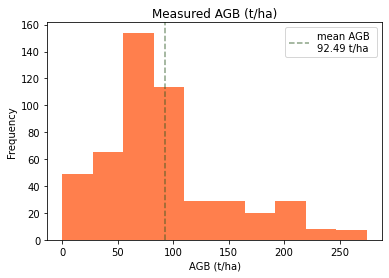

In [216]:
plt.hist(y['AGB_t_ha'], color = "#ff7f4dff")
#axs[0].set_xlim(0,350)
plt.title("Measured AGB (t/ha)")
plt.axvline(np.mean(y['AGB_t_ha']), color = '#25521988', linestyle = '--', 
               label= f'mean AGB \n{np.round(measure_mean,2)} t/ha' )
plt.ylabel('Frequency')
plt.xlabel('AGB (t/ha)')
plt.legend()


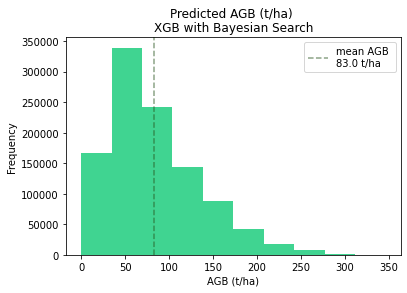

In [217]:
plt.hist(xgb_preds[0], color = "#40d491ff")
#axs[1].set_xlim(0,350)
plt.title("Predicted AGB (t/ha) \nXGB with Bayesian Search")
plt.axvline(np.mean(xgb_preds[0]), color = '#25521988', linestyle = '--', 
               label= f'mean AGB \n{np.round(np.mean(xgb_preds[0]))} t/ha' )
plt.ylabel('Frequency')
plt.xlabel('AGB (t/ha)')
plt.legend()

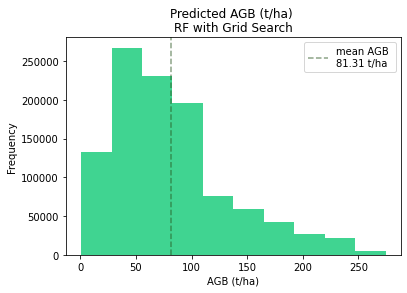

In [218]:
plt.hist(rf_preds[0], color = "#40d491ff")
#axs[2].set_xlim(0,350)
plt.title("Predicted AGB (t/ha) \nRF with Grid Search")
plt.axvline(np.mean(rf_preds[0]), color = '#25521988', linestyle = '--', 
               label= f'mean AGB \n{np.round(np.mean(rf_preds[0]),2)} t/ha' )
plt.ylabel('Frequency')
plt.xlabel('AGB (t/ha)')
plt.legend()

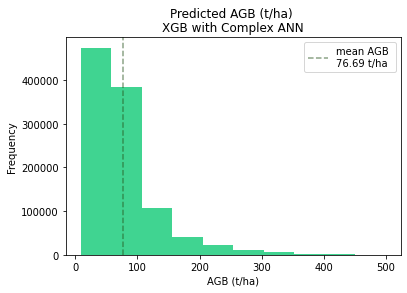

In [219]:
plt.hist(plex_preds[0], color = "#40d491ff")
plt.title("Predicted AGB (t/ha) \nXGB with Complex ANN")
plt.axvline(np.mean(plex_preds[0]), color = '#25521988', linestyle = '--', 
               label= f'mean AGB \n{np.round(np.mean(plex_preds[0]),2)} t/ha' )
plt.ylabel('Frequency')
plt.xlabel('AGB (t/ha)')
plt.legend()

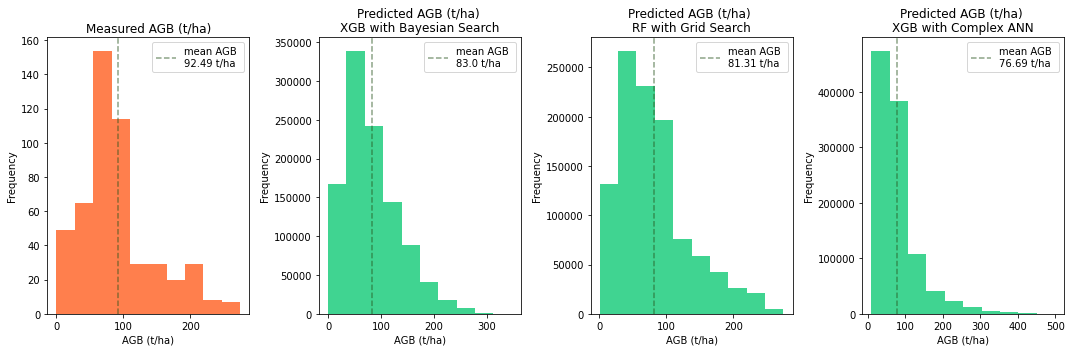

In [214]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, axs = plt.subplots(1, 4, tight_layout=True, figsize =(15,5))

axs[0].hist(y['AGB_t_ha'], color = "#ff7f4dff")
#axs[0].set_xlim(0,350)
axs[0].set_title("Measured AGB (t/ha)")
axs[0].axvline(np.mean(y['AGB_t_ha']), color = '#25521988', linestyle = '--', 
               label= f'mean AGB \n{np.round(measure_mean,2)} t/ha' )
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('AGB (t/ha)')
axs[0].legend()

axs[1].hist(xgb_preds[0], color = "#40d491ff")
#axs[1].set_xlim(0,350)
axs[1].set_title("Predicted AGB (t/ha) \nXGB with Bayesian Search")
axs[1].axvline(np.mean(xgb_preds[0]), color = '#25521988', linestyle = '--', 
               label= f'mean AGB \n{np.round(np.mean(xgb_preds[0]))} t/ha' )
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('AGB (t/ha)')
axs[1].legend()

axs[2].hist(rf_preds[0], color = "#40d491ff")
#axs[2].set_xlim(0,350)
axs[2].set_title("Predicted AGB (t/ha) \nRF with Grid Search")
axs[2].axvline(np.mean(rf_preds[0]), color = '#25521988', linestyle = '--', 
               label= f'mean AGB \n{np.round(np.mean(rf_preds[0]),2)} t/ha' )
axs[2].set_ylabel('Frequency')
axs[2].set_xlabel('AGB (t/ha)')
axs[2].legend()

axs[3].hist(plex_preds[0], color = "#40d491ff")
axs[3].set_title("Predicted AGB (t/ha) \nXGB with Complex ANN")
axs[3].axvline(np.mean(plex_preds[0]), color = '#25521988', linestyle = '--', 
               label= f'mean AGB \n{np.round(np.mean(plex_preds[0]),2)} t/ha' )
axs[3].set_ylabel('Frequency')
axs[3].set_xlabel('AGB (t/ha)')
axs[3].legend()

plt.show()

In [132]:
from scipy import stats
print("XGB:",stats.ks_2samp(y['AGB_t_ha'], preds[0]))

XGB: KstestResult(statistic=0.15444600951348592, pvalue=5.784097972778908e-11)


In [133]:
print( "Random Forest:", stats.ks_2samp(y['AGB_t_ha'], rf_preds[0]))

Random Forest: KstestResult(statistic=0.15871998916247917, pvalue=1.4749688642048252e-11)


In [134]:
print("plex ANN:", stats.ks_2samp(y['AGB_t_ha'], plex_preds[0]))

plex ANN: KstestResult(statistic=0.2348742989591427, pvalue=6.134940802943298e-25)


### 2. Create a table containing only labelled points (both Xs and y)

In [45]:
# modeling_dataset: get only rows with AGB values and get rid of geometry column (to split into train and test)
modeling_dataset = dataset.drop('geometry', 1)
modeling_dataset = modeling_dataset.loc[dataset['AGB_t_ha']!=-9999.0]
# create a modeling_dataset DataFrame
modeling_dataset = pd.DataFrame(modeling_dataset)

### 3. Xs and y

In [46]:
# separate modeling_dataset into X(all features) and y(AGB)
X = modeling_dataset.drop('AGB_t_ha',1)
y = pd.DataFrame(modeling_dataset['AGB_t_ha'])

### 4. Create a new column with plot unique indentifier; there are 73 plots

In [5]:
plot_df = pd.DataFrame()
plot_df['plot_number']=np.argwhere(y.values == np.unique(y))[:,1]
plot_df.index=y.index

### 5. Cross-val and normalize with RobustScaler (funct)

Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method. Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

N.B. only Xs are scaled

In [6]:
%store dataset
%store plot_df
%store X
%store y

Stored 'dataset' (GeoDataFrame)
Stored 'plot_df' (DataFrame)
Stored 'X' (DataFrame)
Stored 'y' (DataFrame)


In [7]:
from sklearn.model_selection import KFold

def cross_val(X,y,folds=7,random_state=42):
    
    kf = KFold(n_splits=folds,random_state=42)
    
    #interates over number of train_plots and val_plots for each fold
    for train_plots, val_plots in kf.split(np.unique(plot_df['plot_number'].unique())): 
        
        #Goes to X, checks which entries have plot number in the train_plots and stacks the entries
        X_train =np.vstack([X[plot_df['plot_number']==plot].values for plot in train_plots])       
        #Goes to X, checks which entries have plot number in the train_plots and stacks the entries
        X_val =np.vstack([X[plot_df['plot_number']==plot].values for plot in val_plots])        
        #Goes to y, checks which entries have plot number in the train_plots and stacks the entries
        y_train =pd.DataFrame(np.vstack([y[plot_df['plot_number']==plot].values for plot in train_plots]))
        y_train.columns=y.columns         
        #Goes to y, checks which entries have plot number in the train_plots and stacks the entries
        y_val =pd.DataFrame(np.vstack([y[plot_df['plot_number']==plot].values for plot in val_plots]))
        y_train.columns=y.columns 
        
        ###SCALING######
        scaler = preprocessing.RobustScaler().fit(X_train)
        X_train = pd.DataFrame(scaler.transform(X_train))
        X_train.columns=X.columns        
        X_val = pd.DataFrame(scaler.transform(X_val))
        X_val.columns=X.columns    
        yield (X_train,y_train),(X_val,y_val) 



In [8]:
for train,val in cross_val(X,y,folds=3):
    print(f'Shape of X_train:{len(train[0])}, and y_train: {len(train[1])}')
    print(f'Shape of X_val:{len(val[0])}, and y_val: {len(val[1])}')
    print('------------------------------------')

Shape of X_train:334, and y_train: 334
Shape of X_val:170, and y_val: 170
------------------------------------
Shape of X_train:338, and y_train: 338
Shape of X_val:166, and y_val: 166
------------------------------------
Shape of X_train:336, and y_train: 336
Shape of X_val:168, and y_val: 168
------------------------------------


/home/antonio/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
